In [6]:
import pandas as pd

df = pd.read_csv('magic04.data', header=None)

df.columns = ['fLength', 'fWidth', 'fSize', 'fConc',
              'fConc1', 'fAsym', 'fM3Long',
              'fM3Trans', 'fAlpha', 'fDist', 'class']

df = df.drop(columns=['class'])
df.head()

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
0,28.7967,16.0021,2.6449,0.3918,0.1982,27.7004,22.0110,-8.2027,40.0920,81.8828
1,31.6036,11.7235,2.5185,0.5303,0.3773,26.2722,23.8238,-9.9574,6.3609,205.2610
2,162.0520,136.0310,4.0612,0.0374,0.0187,116.7410,-64.8580,-45.2160,76.9600,256.7880
3,23.8172,9.5728,2.3385,0.6147,0.3922,27.2107,-6.4633,-7.1513,10.4490,116.7370
4,75.1362,30.9205,3.1611,0.3168,0.1832,-5.5277,28.5525,21.8393,4.6480,356.4620


In [10]:
from sklearn.preprocessing import StandardScaler

sc = StandardScaler()
np_normal = sc.fit_transform(df)
df_normal = pd.DataFrame(np_normal)
df_normal.columns = ['fLength', 'fWidth', 'fSize', 'fConc',
              'fConc1', 'fAsym', 'fM3Long',
              'fM3Trans', 'fAlpha', 'fDist']

In [11]:
df_cov = df_normal.cov()
df_cov

,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.000053,0.770553,0.702491,-0.631032,-0.598177,-0.368576,-0.119753,0.013390,-0.008778,0.418488
fWidth,0.770553,1.000053,0.717555,-0.609811,-0.581171,-0.266975,-0.176243,0.039746,0.066065,0.336834
fSize,0.702491,0.717555,1.000053,-0.850895,-0.808878,-0.159871,0.095162,0.015456,-0.186685,0.437064
fConc,-0.631032,-0.609811,-0.850895,1.000053,0.976463,0.112278,-0.121906,-0.011295,0.235284,-0.328350
fConc1,-0.598177,-0.581171,-0.808878,0.976463,1.000053,0.100164,-0.118775,-0.010966,0.229811,-0.304641
fAsym,-0.368576,-0.266975,-0.159871,0.112278,0.100164,1.000053,0.274059,0.002553,-0.055692,-0.206741
fM3Long,-0.119753,-0.176243,0.095162,-0.121906,-0.118775,0.274059,1.000053,-0.017198,-0.186284,0.037027
fM3Trans,0.013390,0.039746,0.015456,-0.011295,-0.010966,0.002553,-0.017198,1.000053,0.004659,0.011427
fAlpha,-0.008778,0.066065,-0.186685,0.235284,0.229811,-0.055692,-0.186284,0.004659,1.000053,-0.220567
fDist,0.418488,0.336834,0.437064,-0.328350,-0.304641,-0.206741,0.037027,0.011427,-0.220567,1.000053


In [16]:
import numpy as np
e_vals, e_vectors = np.linalg.eig(df_cov)
e_vals_real = np.array([i.real for i in e_vals], dtype=float)
tot = e_vals_real.sum()
var_exp = [(i / tot) for i in sorted(e_vals_real, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(var_exp)

[0.4223990899412475, 0.15751879016646067, 0.1011805319927155, 0.09940126973824936, 0.07420193941999668, 0.06500864672999744, 0.04075385976690108, 0.022036242691608685, 0.01547533812181636, 0.0020242914310067677]


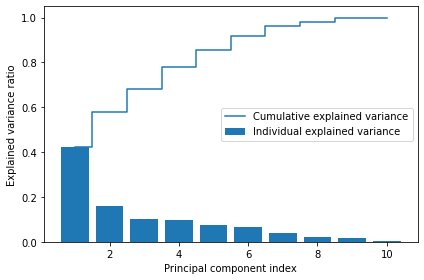

In [17]:
import matplotlib.pyplot as plt


plt.bar(range(1, 11), var_exp, align='center',
        label='Individual explained variance')
plt.step(range(1, 11), cum_var_exp, where='mid',
         label='Cumulative explained variance')
plt.ylabel('Explained variance ratio')
plt.xlabel('Principal component index')
plt.legend(loc='best')
plt.tight_layout()
plt.show()

In [19]:
df_normal.corr().style.background_gradient(cmap='coolwarm').set_precision(2)

/var/folders/6s/fk_m3xbj6k99p2ch5cby1chr0000gn/T/ipykernel_4809/2345356542.py:1: FutureWarning: this method is deprecated in favour of `Styler.format(precision=..)`
  df_normal.corr().style.background_gradient(cmap='coolwarm').set_precision(2)


,fLength,fWidth,fSize,fConc,fConc1,fAsym,fM3Long,fM3Trans,fAlpha,fDist
fLength,1.00,0.77,0.70,-0.63,-0.60,-0.37,-0.12,0.01,-0.01,0.42
fWidth,0.77,1.00,0.72,-0.61,-0.58,-0.27,-0.18,0.04,0.07,0.34
fSize,0.70,0.72,1.00,-0.85,-0.81,-0.16,0.10,0.02,-0.19,0.44
fConc,-0.63,-0.61,-0.85,1.00,0.98,0.11,-0.12,-0.01,0.24,-0.33
fConc1,-0.60,-0.58,-0.81,0.98,1.00,0.10,-0.12,-0.01,0.23,-0.30
fAsym,-0.37,-0.27,-0.16,0.11,0.10,1.00,0.27,0.00,-0.06,-0.21
fM3Long,-0.12,-0.18,0.10,-0.12,-0.12,0.27,1.00,-0.02,-0.19,0.04
fM3Trans,0.01,0.04,0.02,-0.01,-0.01,0.00,-0.02,1.00,0.00,0.01
fAlpha,-0.01,0.07,-0.19,0.24,0.23,-0.06,-0.19,0.00,1.00,-0.22
fDist,0.42,0.34,0.44,-0.33,-0.30,-0.21,0.04,0.01,-0.22,1.00


# Custom kernel

In [ ]:
import numpy as np
from sklearn.metrics.pairwise import pairwise_kernels

#kernel_default = pairwise_kernels(df_normal)
#print('Default metric - Squared euclidean norm as kernel function: \n', kernel_default)

def custom_kernel(x, y):
    # Here you can define your custom transform, e.g.:
    return np.dot(x, y) * np.dot(x, y)

kernel_custom = pairwise_kernels(df_normal, metric=custom_kernel)
print(kernel_custom.shape)

e_vals, e_vectors = np.linalg.eig(kernel_custom)
e_vals_real = np.array([i.real for i in e_vals], dtype=float)
tot = e_vals_real.sum()
var_exp = [(i / tot) for i in sorted(e_vals_real, reverse=True)]
cum_var_exp = np.cumsum(var_exp)
print(len(cum_var_exp))

KeyboardInterrupt: 